In [1]:
source("../R4_Batch_effect_Normalization/mass_cytometry_functions.R")

In [2]:
needed_antibody1<- c('141Pr_INS14','142Nd_CD19','143Nd_CD5','144Nd_INS17','145Nd_INS5','146Nd_IgD',
                    '147Sm_INS19','149Sm_INS18','150Nd_INS20','151Eu_INS16','152Sm_CD21',
                    '153Eu_INS7','155Gd_CD27','158Gd_INS24','159Tb_CD22','160Gd_INS3','161Dy_INS26',
                    '162Dy_Ki67','163Dy_INS8','164Dy_INS25','165Ho_INS11','167Er_CD38','168Er_INS13',
                    '169Tm_INS4','172Yb_IgM','173Yb_INS6','174Yb_INS27','175Lu_CXCR4','176Yb_INS1')
needed_antibody1_rename<- c('KLF10','CD19','CD5','MYC','CD83','IgD','NR4A2','PPP1R15A','JUND','FOSB',
                            'CD21','RGS1','CD27','KLF6','CD22','TCL1A','DDIT3','Ki67','YPEL5','HSPA5',
                            'TXNIP','CD38','RGS2','EGR1','IgM','CD69','FOS','CXCR4','Actin')

In [3]:
number_of_cell = NULL
concat_result <- generate_concat(c("c"), 
                "../R4_Batch_effect_Normalization/Data/20 CLL/",
                number_of_cell,
                column_needed = needed_antibody1,
                rename_columns_needed = needed_antibody1_rename,
                "yes",
                "playR_concattransformed_all"
               )

In [39]:
df<- fcs_to_dataframe("playR_concattransformed_all.fcs",
                  needed_antibody1_rename,
                  FALSE
                )



####fcs_to_dataframe is not yet transforming

In [19]:
#write.csv(df, "playR_concattransformed_all.csv")

In [4]:
set.seed(45)
fSOM <- FlowSOM('playR_concattransformed_all.fcs',
compensate = FALSE, transform = FALSE,
scale = FALSE,
colsToUse = c(1:29), xdim = 10, ydim = 10,
nClus = 20)

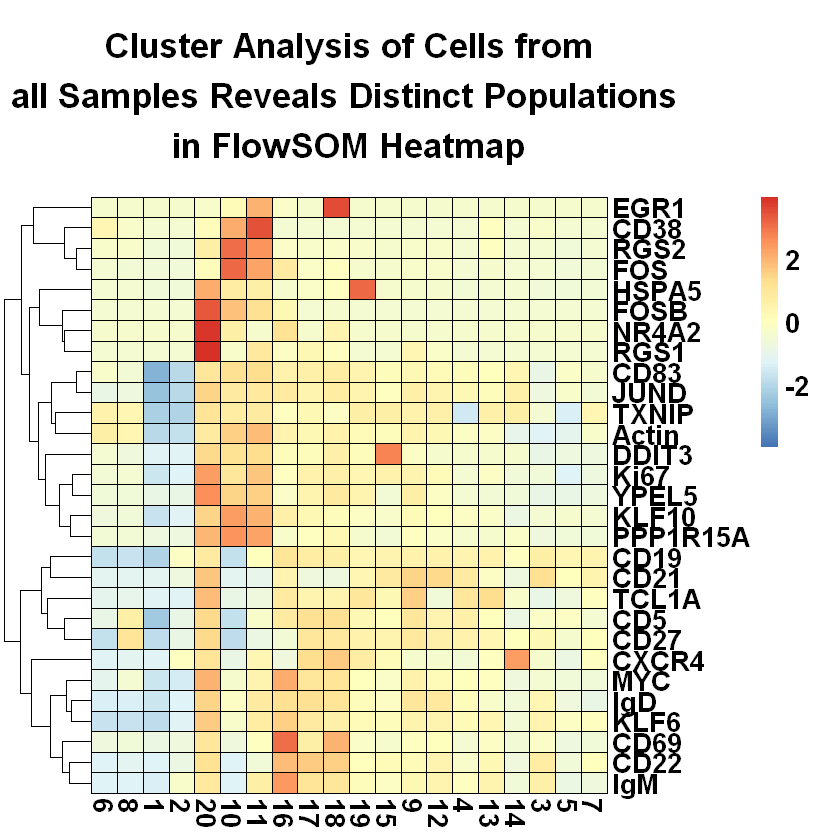

In [35]:
results<- FlowSOM::MetaclusterMFIs(fsom = fSOM)
plot3<- pheatmap::pheatmap(t(results),  
                           border_color = "black", 
                           scale="row",
                           fontsize=16, 
                           fontface= "bold",
                           
                   #annotation_row = rownames(average),
                   #treeheight_row = 0,
                   treeheight_col = 0,
                   #cutree_rows = 2,
                    #show_colnames = F,
                    #show_rownames = F,
                   #kmeans_k= 4,
                    #color = c("blue", "yellow","red"),
                    #breaks = c(-4, -0.5, 1, 4), 
                    main = "Cluster Analysis of Cells from\nall Samples Reveals Distinct Populations \nin FlowSOM Heatmap"
                  )

In [ ]:
###a function that will generate a csv file with a new column containing label that will be obtained by dictionary 


In [36]:
#changes clusters to metaclusters
tobeindexed<- fSOM[[1]]$map$mapping
yyy<- fSOM[[2]]
attributes(yyy)<- NULL
metaclusters_of_all_cell<- yyy[tobeindexed[, 1]]

In [40]:
changes_meta_to_custom<- function(value){
my_dict<- list(
"Ki67+/Cmyc+" = c(20),
"Ki67-/Cmyc+" = c(11),
"Ki67+/Cmyc-" = c(16),
"Ki67-/Cmyc-" = c(1,2,3,4,5,6,7,8,9,10,12,13,14,15,17,18,19)
)

value <- value
keys <- names(my_dict)[sapply(my_dict, function(x) any(x == value))]
return(keys)
}
                              
result <- lapply(metaclusters_of_all_cell, FUN = changes_meta_to_custom)
final_labels<- unlist(result)
                              
df$labels<- final_labels
write.csv(df, "playR_concattransformed_all.csv")

In [41]:
df<- read.csv("playR_concattransformed_all.csv")

In [42]:
labels <- df$labels

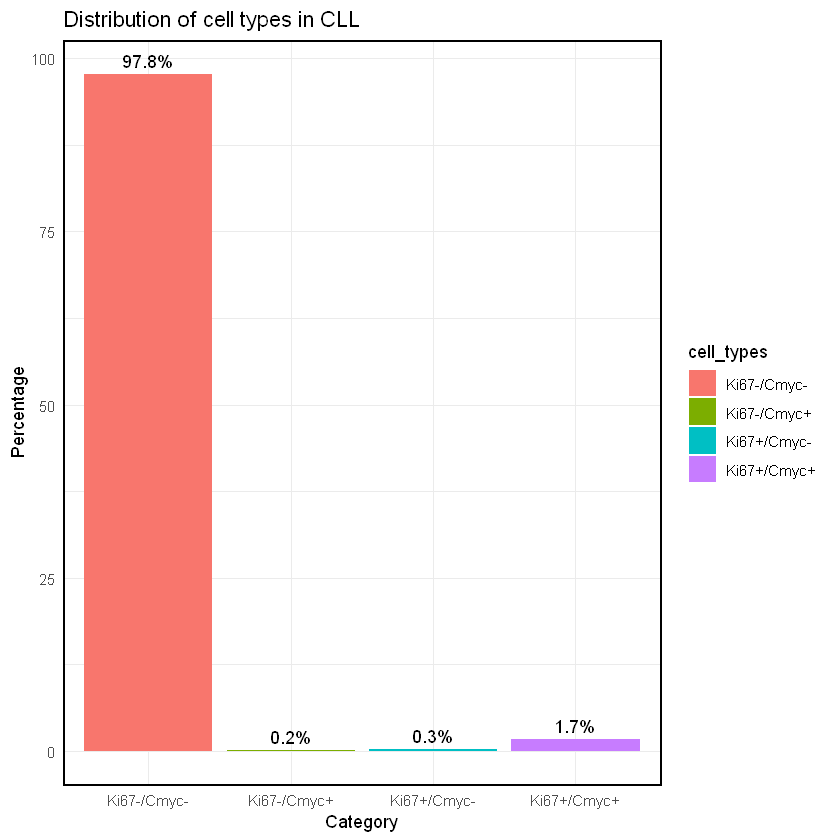

In [45]:
data<- labels

# Calculate percentage table
table_data <- prop.table(table(data)) * 100

# Create a data frame from the table data
df <- data.frame(cell_types = names(table_data), Percentage = table_data)



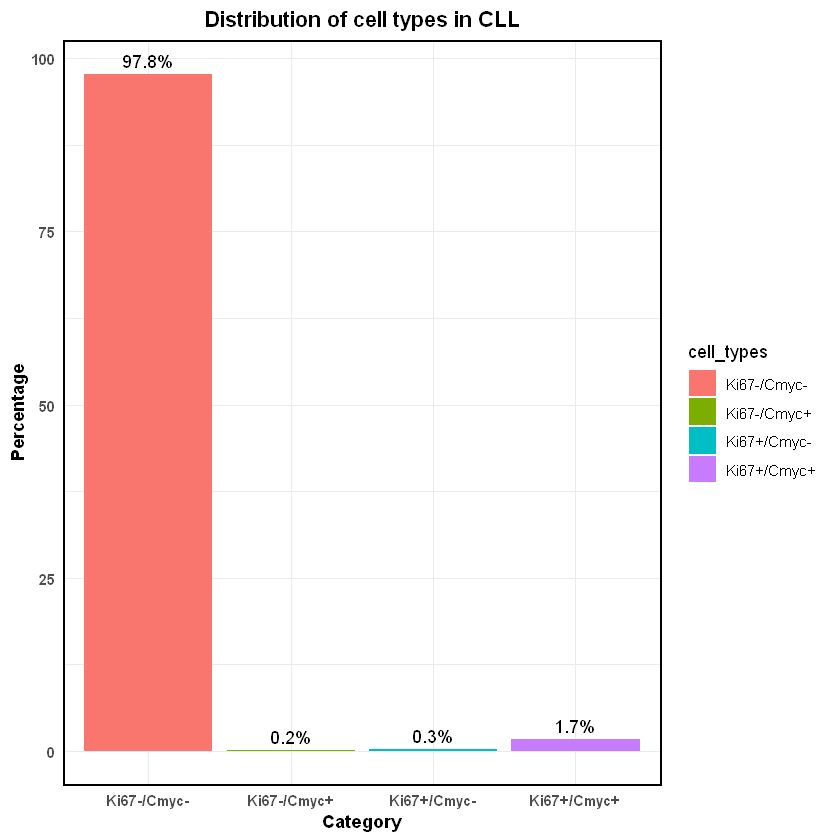

In [47]:
# Generate the bar chart
ggplot(df, aes(x = cell_types, y = Percentage.Freq, fill = cell_types)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Percentage.Freq, 1), "%")), vjust = -0.5) +
  labs(x = "Category", y = "Percentage") +
  theme_minimal()+
  theme(panel.border = element_rect(color = "black", fill = NA, size = 1),
       plot.title = element_text(face = "bold", hjust = 0.5),
               axis.text = element_text(face = "bold"),
        axis.title = element_text(face = "bold"))+
  ggtitle("Distribution of cell types in CLL")

### convert just one fcs file to csv

In [2]:
needed_antibody2_rename<- c('CD19','CD5','IgD', 'CD21', 'CD27','CD22','CD38','IgM','CD69','CXCR4')
needed_antibody2<- c('142Nd_CD19','143Nd_CD5','146Nd_IgD', '152Sm_CD21', '158Gd_CD27',
                     '159Tb_CD22','144Nd_CD38','172Yb_IgM','151Eu_CD69','175Lu_CXCR4')

In [3]:
number_of_cell = NULL
concat_result <- generate_concat(c("Batch_3_12nonanchor1"), 
                "../R4_Batch_effect_Normalization/Data/all_cytonorm_normalized/",
                number_of_cell,
                column_needed = needed_antibody2,
                rename_columns_needed = needed_antibody2_rename,
                "yes",
                "testing_123"
               )

In [4]:
df<- fcs_to_dataframe("testing_123.fcs",
                  needed_antibody2_rename,
                  FALSE
                )

In [5]:
write.csv(df, "testing_123.csv")

In [59]:
matrix1 <- matrix(rnorm(1000^2), nrow = 1000, ncol = 1000)
matrix2 <- matrix(rnorm(1000^2), nrow = 1000, ncol = 1000)

# Perform matrix multiplication (CPU-intensive task)
result <- matrix1 %*% matrix2

# Print the result
print(result)

                 [,1]         [,2]          [,3]          [,4]         [,5]
   [1,]    7.68370740  34.06170119 -1.184701e+01    5.91163853 -26.04015110
   [2,]  -39.73950672  17.94755540  4.710773e+01    8.18411362  -8.00108196
   [3,]    0.74346892 -11.61630961  3.407070e+01   34.06107516 -15.16880817
   [4,]   -5.38445403  -6.54733190  3.118771e+01    2.68049903  -0.22793281
   [5,]   -6.19152156 -43.03166994 -2.070978e+01   44.81574173  -3.02718650
   [6,]   10.59920018  -1.61496370  8.372323e+00   53.45058708  37.22140172
   [7,]   13.25687760 -34.05875614  4.124193e+01  -32.38098798 -41.25843554
   [8,]   11.72412887  -9.34774835  4.468181e+00   -3.32639563   8.08912193
   [9,]   -8.46343877   5.67343113 -3.425668e+01  -26.38516107  -6.98147234
  [10,]  -10.06928803 -28.36041029  1.241463e+01   55.36750129   9.18822854
  [11,]   23.36707069 -26.65378043  3.620072e+01   27.63001459  -8.30248316
  [12,]   -1.51226927 -22.21136113 -1.181379e+01   25.08868519 -10.04501021
  [13,]   46